# Youtube Trending Video Statistics (2017-2018)
It's important to note that this **only** contains trending videos from a certain time period, so any statistics calculated only apply to this population.
Also, one video can go trending multiple times, so there are certainly duplicate videos that went trending at different times in the dataset, that I won't exclude from the data except for certain calculations.

Here's the raw data, with category ids mapped to their string values for better readability.
<br>
**Note:** Loading and mapping the 40949 rows takes a while, but everything is a breeze after that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import datetime as dt

csv_file = 'USvideos.csv'
json_file = 'US_category_id.json'

#Loading files into variables
trending_videos = pd.read_csv(csv_file, index_col='video_id')
categories_json = json.load(open(json_file,'r'))
categories_by_id = {}
categories_by_name = {}

for category in categories_json['items']:
    categories_by_id[category['id']] = category['snippet']['title']
    categories_by_name[category['snippet']['title']] = category['id']
    
for video in trending_videos.transpose():
    try:
        category_id = trending_videos.loc[video, "category_id"].iloc[0]
    except:
        category_id = trending_videos.loc[video, "category_id"]
    if isinstance(category_id, str) == True:
         continue
    trending_videos.loc[video, "category_id"] = categories_by_id[str(category_id)]

trending_videos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...


### Simple pie chart showing the distribution of views in trending videos


The videos are grouped into the categories 'Under 100k views', '100k to 500k views', '500k to 1m views', '1m to 3m views', and '3m and above views.'

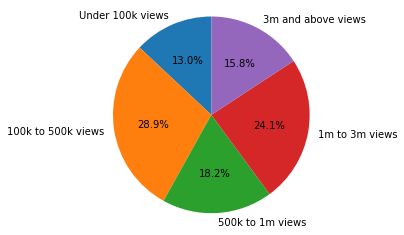

In [2]:
views_list = list()
for i in range(0, len(trending_videos)):
    views_list.append(trending_videos['views'][i])
labels = 'Under 100k views', '100k to 500k views', '500k to 1m views', '1m to 3m views', '3m and above views'
data = [0, 0, 0, 0, 0]

for i in range(len(views_list)):
    if(views_list[i] > 3000000):
        data[4] += 1
    elif(views_list[i] > 1000000):
        data[3] += 1
    elif(views_list[i] > 500000):
        data[2] += 1
    elif(views_list[i] > 100000):
        data[1] += 1
    elif(views_list[i] > 0):
        data[0] += 1

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### Distribution of trending videos by category

It's pretty easy to see that certain categories of videos are more popular or more likely to go trending than others. The biggest ones are Entertainment, Music, Howto & Style, People & Blogs, and Comedy, which comprise about 2/3 of the dataset alone!

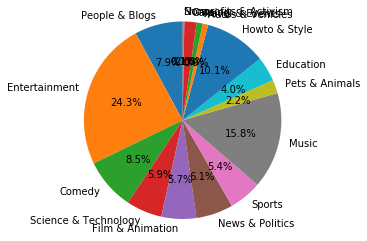

In [3]:
categories_list = {}
for i in range(0, len(trending_videos)):
    if trending_videos['category_id'][i] in categories_list:
        categories_list[trending_videos['category_id'][i]] += 1
    else:
        categories_list[trending_videos['category_id'][i]] = 1

fig1, ax1 = plt.subplots()
ax1.pie(categories_list.values(), labels=categories_list.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### Distribution of trending videos by category (minority grouped as other)

With the tons of tiny categories lost in there, I thought it would be better to group them as an 'other' category, which makes the graph much more readable. Here it is below!

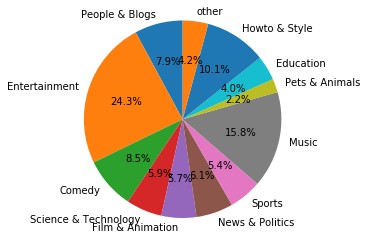

In [4]:
categories_list = {}
categories_to_delete = []
for i in range(0, len(trending_videos)):
    if trending_videos['category_id'][i] in categories_list:
        categories_list[trending_videos['category_id'][i]] += 1
    else:
        categories_list[trending_videos['category_id'][i]] = 1
categories_list['other'] = 0
for category in categories_list:
    if categories_list[category] < 900 and category != 'other':
        categories_list['other'] += categories_list[category]
        categories_to_delete.append(category)
for category in categories_to_delete:
    del categories_list[category]
fig1, ax1 = plt.subplots()
ax1.pie(categories_list.values(), labels=categories_list.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### Trending Tag Statistics

I thought it would be cool to track usage of tags in the many different trending videos, and see if there was any pattern in their usage over time and by categories.

<ipython-input-6-c8f6ca644da9>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operation['tags'][i] = tag
Found 12 results with tag 'Trump'.


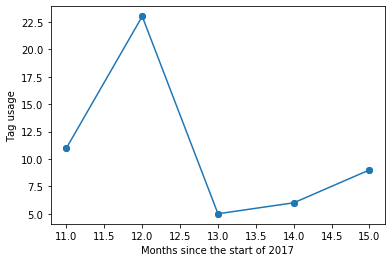

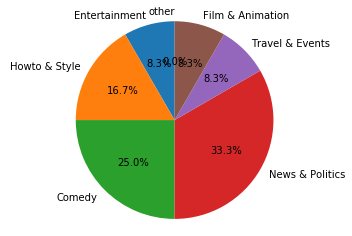

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
k8NxqyGcZA4,17.14.11,Rosie O’Donnell On Donald Trump’s Hostility To...,Watch What Happens Live with Andy Cohen,Entertainment,2017-11-10T12:59:55.000Z,"What What Happens live|""reality""|""interview""|""...",238643,2429,5381,2325,https://i.ytimg.com/vi/k8NxqyGcZA4/default.jpg,False,False,False,Rosie O’Donnell doesn’t hold back about Donald...
x-uBFJLY8Ow,17.17.11,Designing for Small Batch Low Volume Manufactu...,Eric Strebel,Howto & Style,2017-11-08T17:00:03.000Z,"industrial|""design""|""time lapse""|""product""|""de...",3591,92,4,14,https://i.ytimg.com/vi/x-uBFJLY8Ow/default.jpg,False,False,False,This video is about Designing For Low volume M...
HHtfcjwHERA,17.22.11,Drill Press Machining Hacking/Tips and Tricks:...,Eric Strebel,Howto & Style,2017-11-15T17:00:04.000Z,"industrial|""design""|""time lapse""|""product""|""de...",4452,140,10,13,https://i.ytimg.com/vi/HHtfcjwHERA/default.jpg,False,False,False,10 Bake-sale Basic Machining hacks/Tips and Tr...
4WnizmrnJlk,17.02.12,Matt Lauer Sexual Harassment Allegations; Trum...,Late Night with Seth Meyers,Comedy,2017-12-01T02:00:01.000Z,"Late night|""Seth Meyers""|""closer Look""|""Matt l...",1855536,21004,1295,2692,https://i.ytimg.com/vi/4WnizmrnJlk/default.jpg,False,False,False,Seth takes a closer look at how the national r...
KdfCcEnJDlY,17.14.12,Amber Explains How Black Women Saved America f...,Late Night with Seth Meyers,Comedy,2017-12-14T01:28:23.000Z,"late night|""seth meyers""|""trump""|""Amber Ruffin...",141112,6143,785,987,https://i.ytimg.com/vi/KdfCcEnJDlY/default.jpg,False,False,False,Late Night writer Amber Ruffin takes a moment ...
noUH5aYUBx4,17.16.12,FCC Votes to Repeal Net Neutrality; Omarosa Dr...,Late Night with Seth Meyers,Comedy,2017-12-15T02:00:05.000Z,"seth meyers|""late night""|""closer look""|""trump""...",1684275,23285,1510,2938,https://i.ytimg.com/vi/noUH5aYUBx4/default.jpg,False,False,False,Seth takes a closer look at the Federal Commun...
lcpxLXjYAa8,17.21.12,Americans could see tax bill impact in early 2018,ABC News,News & Politics,2017-12-20T14:30:30.000Z,"Senate|""pass""|""Republican""|""tax""|""reform""|""his...",160447,1041,573,1510,https://i.ytimg.com/vi/lcpxLXjYAa8/default.jpg,False,False,False,Less money could be withheld from people's pay...
XCz66YlNbPQ,18.18.01,Trump - S**thole Countries - shithole statemen...,Gondwana Collection Namibia,Travel & Events,2018-01-12T22:14:10.000Z,"Trump|""shithole""|""shithole countries""|""stateme...",213584,1878,59,195,https://i.ytimg.com/vi/XCz66YlNbPQ/default.jpg,False,False,False,• Subscribe To Gondwana: https://goo.gl/c7B7Jz...
2_dkBgK4Mbk,18.21.01,Short-term spending bill fails in the Senate,Washington Post,News & Politics,2018-01-20T04:43:42.000Z,"President Trump|""President Donald Trump""|""Trum...",13044,68,22,220,https://i.ytimg.com/vi/2_dkBgK4Mbk/default.jpg,False,False,False,A short-term spending bill failed during a pro...


In [6]:
pd.set_option('display.max_rows', 10)
tag = input("Enter the tag to search:")
unique = input("Show duplicate results (Y/N)? (videos that went trending more than once):").lower()
match_condition = input("Match term (Y/N)? (Excludes tags that may contain the term in it but not by itself):").lower()
results = input("Show all results (Y/N)?")
if results == "y":
    pd.set_option('display.max_rows', 1000000)
if unique == "n":
    unique = True
else:
    unique = False
    
if match_condition == "n":
    match_condition = False
else:
    match_condition = True

months_from_2017 = {}
unique_keys = {}
tag_count = 0
operation = trending_videos.copy()
category_association = {}
categories_to_delete = []
for i in range(0, len(trending_videos)):
    tags = trending_videos['tags'][i]
    if match_condition == True:
        tags = tags.replace('"','').replace("[none]","").split('|')
    if tag in tags:
        trending_date_text = trending_videos['trending_date'][i].split(".")
        months = int(trending_date_text[2])
        if trending_date_text[0] == "18":
            months += 12
        if months in months_from_2017:
            months_from_2017[months] += 1
        else:
            months_from_2017[months] = 1
        if trending_videos.index[i] in unique_keys:
            continue
        operation['tags'][i] = tag
        tag_count += 1
        if trending_videos['category_id'][i] in category_association:
            category_association[trending_videos['category_id'][i]] += 1
        else:
            category_association[trending_videos['category_id'][i]] = 1
        if unique == True:
            unique_keys[trending_videos.index[i]] = True
category_association['other'] = 0
for category in category_association:
    if category_association[category] < 0.04 * tag_count and category != 'other':
        category_association['other'] += category_association[category]
        categories_to_delete.append(category)
for category in categories_to_delete:
    del category_association[category]
print("Found " + str(tag_count) + " results with tag '" + tag + "'.")

mx = []
mv = []
for month in months_from_2017:
    mx.append(int(month))
    mv.append(int(months_from_2017[month]))
    
scatterboi = plt.scatter(mx, mv) #creates a scatterplot object. The first parameter is the x-axis variable and the second parameter is the y-axis variable. 
plt.plot(mx, mv, linestyle='-', marker='o')
plt.xlabel("Months since the start of 2017") #label for the x-axis
plt.ylabel("Tag usage") #label for the y-axis
ax = plt.gca() # gets an instance of the current axes (so everything that is in black is an object)
ax.set_facecolor('#FFFFFF') #colors the background of the object we created in the last line

fig1, ax1 = plt.subplots()
ax1.pie(category_association.values(), labels=category_association.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()
trending_videos[operation['tags'] == tag]

### Top 100 most common tags used

In [7]:
tags_list = {}
for i in range(0, len(trending_videos)):
    for tag in trending_videos['tags'][i].replace('"','').replace("[none]","").split('|'):
        if(tag != ""):
            if tag in tags_list:
                tags_list[tag] += 1
            else:
                tags_list[tag] = 1
data = []
for key in tags_list:
    value = tags_list[key]
    data.append({'tag': key, 'uses': value})
tags_df = pd.DataFrame(data)
tags_df.set_index('tag', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['uses'], ascending=False).head(100)

,uses
tag,
funny,3603
comedy,2931
how to,1604
music,1302
Pop,1280
2018,1275
humor,1185
food,1159
science,1111


### Top channels by most trending videos

In [8]:
channels_list = {}
for i in range(0, len(trending_videos)):
    channel = trending_videos['channel_title'][i]
    if(channel != ""):
        if channel in channels_list:
            channels_list[channel] += 1
        else:
            channels_list[channel] = 1
data = []
for key in channels_list:
    value = channels_list[key]
    data.append({'channel': key, 'videos': value})
tags_df = pd.DataFrame(data)
tags_df.set_index('channel', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['videos'], ascending=False).head(100)

,videos
channel,
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
TheEllenShow,193
Vox,193
Netflix,193
The Late Show with Stephen Colbert,187
Jimmy Kimmel Live,186
Late Night with Seth Meyers,183
Screen Junkies,182


### Top categories by most trending videos

In [9]:
categories_list = {}
for i in range(0, len(trending_videos)):
    if trending_videos['category_id'][i] in categories_list:
        categories_list[trending_videos['category_id'][i]] += 1
    else:
        categories_list[trending_videos['category_id'][i]] = 1

data = []
for key in categories_list:
    value = categories_list[key]
    data.append({'category': key, 'uses': value})
tags_df = pd.DataFrame(data)
tags_df.set_index('category', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['uses'], ascending=False)

,uses
category,
Entertainment,9956
Music,6461
Howto & Style,4149
Comedy,3470
People & Blogs,3230
News & Politics,2485
Science & Technology,2398
Film & Animation,2340
Sports,2191


### Top categories by most trending videos (unique)

In [10]:
categories_list = {}
videos = {}
for i in range(0, len(trending_videos)):
    if trending_videos.index[i] in videos:
        continue
    if trending_videos['category_id'][i] in categories_list:
        categories_list[trending_videos['category_id'][i]] += 1
    else:
        categories_list[trending_videos['category_id'][i]] = 1
    videos[trending_videos.index[i]] = True

data = []
for key in categories_list:
    value = categories_list[key]
    data.append({'category': key, 'uses': value})
tags_df = pd.DataFrame(data)
tags_df.set_index('category', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['uses'], ascending=False)

,uses
category,
Entertainment,1619
Music,799
Howto & Style,595
Comedy,547
News & Politics,505
People & Blogs,498
Sports,451
Science & Technology,380
Film & Animation,318


### Average Trending Frequency of Each Video by Category

In [11]:
categories_list = {}
unique_categories_list = {}
videos = {}
for i in range(0, len(trending_videos)):
    if trending_videos.index[i] in videos:
        categories_list[trending_videos['category_id'][i]] += 1
    elif trending_videos['category_id'][i] in categories_list:
        categories_list[trending_videos['category_id'][i]] += 1
        unique_categories_list[trending_videos['category_id'][i]] += 1
    else:
        categories_list[trending_videos['category_id'][i]] = 1
        unique_categories_list[trending_videos['category_id'][i]] = 1
    videos[trending_videos.index[i]] = True

data = []
for key in categories_list:
    value = round(categories_list[key] / unique_categories_list[key] * 100) / 100
    data.append({'category': key, 'avg times a video from this category went trending': value})
tags_df = pd.DataFrame(data)
tags_df.set_index('category', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['avg times a video from this category went trending'], ascending=False)

,avg times a video from this category went trending
category,
Shows,14.25
Music,8.09
Gaming,7.93
Film & Animation,7.36
Howto & Style,6.97
Travel & Events,6.75
Education,6.62
Pets & Animals,6.56
People & Blogs,6.49


### Distribution of views in all trending videos

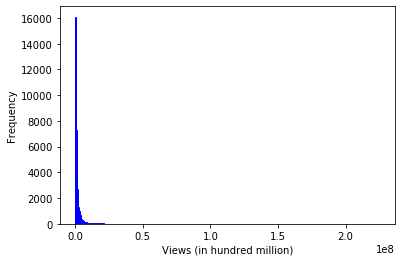

In [13]:
views = []
for i in range(0, len(trending_videos)):
    views.append(trending_videos['views'][i])
plt.hist(views, bins = 500, color = '#ffff00', edgecolor = 'b') 
plt.ylabel("Frequency")
plt.xlabel("Views (in hundred million)")
ax = plt.gca()
ax.set_facecolor('#FFFFFF')

### Likes, Dislikes, Views, and Comments Statistics by Category

**Ordered by Like to Dislike ratio**

In [14]:
categories_views = {}
categories_likes = {}
categories_dislikes = {}
categories_comments = {}
unique_categories_list = {}
videos = {}
for i in range(0, len(trending_videos)):
    if trending_videos.index[i] in videos:
        continue
    elif trending_videos['category_id'][i] in categories_likes:
        categories_likes[trending_videos['category_id'][i]] += trending_videos['likes'][i]
        categories_dislikes[trending_videos['category_id'][i]] += trending_videos['dislikes'][i]
        categories_comments[trending_videos['category_id'][i]] += trending_videos['comment_count'][i]
        categories_views[trending_videos['category_id'][i]] += trending_videos['views'][i]
    else:
        categories_likes[trending_videos['category_id'][i]] = trending_videos['likes'][i]
        categories_dislikes[trending_videos['category_id'][i]] = trending_videos['dislikes'][i]
        categories_comments[trending_videos['category_id'][i]] = trending_videos['comment_count'][i]
        categories_views[trending_videos['category_id'][i]] = trending_videos['views'][i]
    videos[trending_videos.index[i]] = True

data = []
for key in categories_likes:
    likes = categories_likes[key]
    dislikes = categories_dislikes[key]
    comments = categories_comments[key]
    views = categories_views[key]
    view_like_ratio = round(views / likes * 100) / 100
    view_comment_ratio = round(views / comments * 100) / 100
    like_dislike_ratio = round(likes / dislikes * 100) / 100
    like_comment_ratio = round(likes / comments * 100) / 100
    data.append({'category': key, 'total views': views, 'total likes': likes, 'total dislikes': dislikes, 'comments': comments, 'view to like ratio': view_like_ratio, 'view to comment ratio': view_comment_ratio, 'like to dislike ratio': like_dislike_ratio, 'like to comment ratio': like_comment_ratio})
tags_df = pd.DataFrame(data)
tags_df.set_index('category', inplace=True)
pd.set_option('display.max_rows', 1000000)
tags_df.sort_values(['like to dislike ratio'], ascending=False)

,total views,total likes,total dislikes,comments,view to like ratio,view to comment ratio,like to dislike ratio,like to comment ratio
category,,,,,,,,
Pets & Animals,38654401,1564320,27582,231772,24.71,166.78,56.72,6.75
Shows,1569435,47145,1017,4915,33.29,319.32,46.36,9.59
Music,1108709326,82644713,1965030,8235063,13.42,134.63,42.06,10.04
Howto & Style,281517665,14210038,359758,2323604,19.81,121.16,39.50,6.12
Comedy,422806173,21425434,563266,2307283,19.73,183.25,38.04,9.29
Education,87994865,3853548,108826,476121,22.83,184.82,35.41,8.09
Film & Animation,292697703,9784712,298420,1311947,29.91,223.10,32.79,7.46
Science & Technology,222042546,6865912,296796,949591,32.34,233.83,23.13,7.23
Travel & Events,14490662,335481,14745,58051,43.19,249.62,22.75,5.78


**Ordered by Like to Comment ratio**

In [15]:
tags_df.sort_values(['like to comment ratio'], ascending=False)

,total views,total likes,total dislikes,comments,view to like ratio,view to comment ratio,like to dislike ratio,like to comment ratio
category,,,,,,,,
Music,1108709326,82644713,1965030,8235063,13.42,134.63,42.06,10.04
Shows,1569435,47145,1017,4915,33.29,319.32,46.36,9.59
Comedy,422806173,21425434,563266,2307283,19.73,183.25,38.04,9.29
Education,87994865,3853548,108826,476121,22.83,184.82,35.41,8.09
Sports,374456969,8966861,475252,1168035,41.76,320.59,18.87,7.68
Film & Animation,292697703,9784712,298420,1311947,29.91,223.10,32.79,7.46
Science & Technology,222042546,6865912,296796,949591,32.34,233.83,23.13,7.23
People & Blogs,354958216,16043681,842966,2347848,22.12,151.18,19.03,6.83
Pets & Animals,38654401,1564320,27582,231772,24.71,166.78,56.72,6.75


**Ordered by Views to Likes ratio**

In [16]:
tags_df.sort_values(['view to like ratio'], ascending=False)

,total views,total likes,total dislikes,comments,view to like ratio,view to comment ratio,like to dislike ratio,like to comment ratio
category,,,,,,,,
News & Politics,124950593,1950958,478590,748913,64.05,166.84,4.08,2.61
Autos & Vehicles,28445164,449117,26245,89825,63.34,316.67,17.11,5.00
Travel & Events,14490662,335481,14745,58051,43.19,249.62,22.75,5.78
Sports,374456969,8966861,475252,1168035,41.76,320.59,18.87,7.68
Shows,1569435,47145,1017,4915,33.29,319.32,46.36,9.59
Science & Technology,222042546,6865912,296796,949591,32.34,233.83,23.13,7.23
Film & Animation,292697703,9784712,298420,1311947,29.91,223.10,32.79,7.46
Entertainment,1322922283,44247100,3014394,6833341,29.90,193.60,14.68,6.48
Pets & Animals,38654401,1564320,27582,231772,24.71,166.78,56.72,6.75


**Ordered by Views to Comments ratio**

In [17]:
tags_df.sort_values(['view to comment ratio'], ascending=False)

,total views,total likes,total dislikes,comments,view to like ratio,view to comment ratio,like to dislike ratio,like to comment ratio
category,,,,,,,,
Sports,374456969,8966861,475252,1168035,41.76,320.59,18.87,7.68
Shows,1569435,47145,1017,4915,33.29,319.32,46.36,9.59
Autos & Vehicles,28445164,449117,26245,89825,63.34,316.67,17.11,5.00
Travel & Events,14490662,335481,14745,58051,43.19,249.62,22.75,5.78
Science & Technology,222042546,6865912,296796,949591,32.34,233.83,23.13,7.23
Film & Animation,292697703,9784712,298420,1311947,29.91,223.10,32.79,7.46
Entertainment,1322922283,44247100,3014394,6833341,29.90,193.60,14.68,6.48
Education,87994865,3853548,108826,476121,22.83,184.82,35.41,8.09
Comedy,422806173,21425434,563266,2307283,19.73,183.25,38.04,9.29


### Comparing two statistics of a Category with a Scatterplot

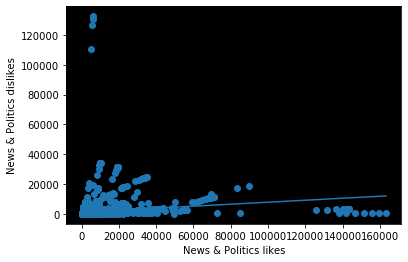

In [19]:
category_response = input("What category would you like to view the graph of?")
comparator1 = input("Comparator 1 (views/likes/dislikes/comment_count)?")
comparator2 = input("Comparator 2 (views/likes/dislikes/comment_count)?")
sample = trending_videos[trending_videos['category_id'] == category_response]
sample_x = list(sample[comparator1])
sample_y = list(sample[comparator2])
scatterboi = plt.scatter(sample_x, sample_y) #creates a scatterplot object. The first parameter is the x-axis variable and the second parameter is the y-axis variable. 
plt.xlabel(category_response + " " + comparator1) #label for the x-axis
plt.ylabel(category_response + " " + comparator2) #label for the y-axis
plt.plot(np.unique(sample_x), np.poly1d(np.polyfit(sample_x, sample_y, 1))(np.unique(sample_x))) #draws a line of best fit from the data points
ax = plt.gca() # gets an instance of the current axes (so everything that is in black is an object)
ax.set_facecolor('#000000') #colors the background of the object we created in the last line